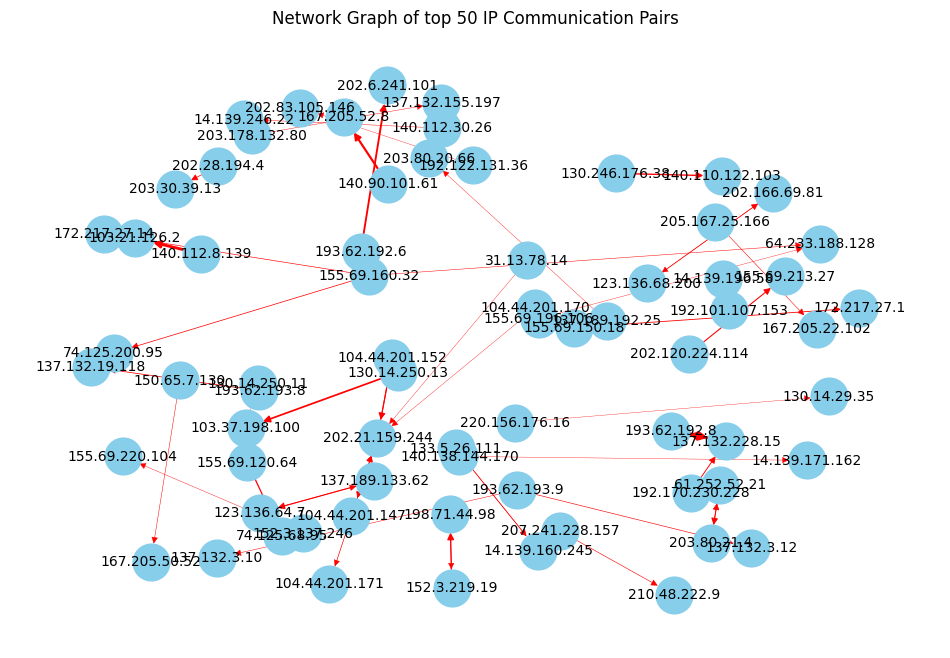

In [137]:
import pandas as pd

df = pd.read_csv('SFlow_Data_lab4.csv', header=None)
df = df.iloc[:, :-1]
df.columns = ['type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_packet_size', 'sampling_rate']
df = df[df['type'] != 'CNTR']

def top_n(column_name, n):
	counts = df.groupby(column_name).size().reset_index(name='count')
	descending_counts = counts.sort_values(by='count', ascending=False)
	return descending_counts.head(n)

top_50_comm_pairs = top_n(['src_IP', 'dst_IP'], 50)

  
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Initialize a directed graph
G = nx.MultiDiGraph()

# Add edges to the graph with weights based on the frequency of communication
for index, (src, dst, count) in top_50_comm_pairs.iterrows():
  G.add_edge(src, dst, weight=count)

# Draw the network graph again
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.5, iterations=16)
# pos = nx.circular_layout(G, scale=1)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight']/1000 for (u, v, d) in G.edges(data=True)], edge_color='red', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network Graph of top 50 IP Communication Pairs')
plt.axis('off')
plt.show()

In [131]:
degree_dict = dict(G.degree())
avg_degree = sum(degree_dict.values())/len(degree_dict.items())
avg_degree

1.4285714285714286

In [125]:
degree_dict

{'193.62.192.8': 2,
 '137.132.228.15': 3,
 '130.14.250.11': 2,
 '103.37.198.100': 3,
 '14.139.196.58': 1,
 '192.101.107.153': 1,
 '140.112.8.139': 1,
 '103.21.126.2': 1,
 '140.90.101.61': 1,
 '167.205.52.8': 1,
 '193.62.192.6': 1,
 '202.6.241.101': 1,
 '130.14.250.13': 1,
 '152.3.219.19': 2,
 '198.71.44.98': 2,
 '130.246.176.38': 1,
 '140.110.122.103': 1,
 '155.69.120.64': 1,
 '74.125.68.95': 1,
 '104.44.201.152': 2,
 '202.21.159.244': 8,
 '137.189.133.62': 2,
 '123.136.64.7': 2,
 '202.120.224.114': 1,
 '155.69.213.27': 1,
 '61.252.52.21': 2,
 '203.80.21.4': 2,
 '192.170.230.228': 1,
 '155.69.150.18': 1,
 '172.217.27.1': 1,
 '104.44.201.147': 2,
 '133.5.26.111': 2,
 '14.139.160.245': 2,
 '193.62.193.8': 1,
 '137.132.19.118': 1,
 '155.69.160.32': 3,
 '74.125.200.95': 1,
 '123.136.68.200': 2,
 '202.166.69.81': 2,
 '202.28.194.4': 1,
 '203.30.39.13': 1,
 '172.217.27.14': 1,
 '193.62.193.9': 2,
 '137.132.3.12': 1,
 '207.241.228.157': 1,
 '210.48.222.9': 1,
 '205.167.25.166': 1,
 '167.205.2

In [123]:
b = list(top_50_comm_pairs['src_IP'])
c= list(top_50_comm_pairs['dst_IP'])
b += c
import numpy as np
a = np.unique(np.array(b))
len(a)



70

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('SFlow_Data_lab4.csv', header=None)
df = df.iloc[:, :-1]
df.columns = ['type', 'sflow_agent_address', 'inputPort', 'outputPort', 'src_MAC', 'dst_MAC', 'ethernet_type', 'in_vlan', 'out_vlan', 'src_IP', 'dst_IP', 'IP_protocol', 'ip_tos', 'ip_ttl', 'udp_src_port/tcp_src_port/icmp_type', 'udp_dst_port/tcp_dst_port/icmp_code', 'tcp_flags', 'packet_size', 'IP_packet_size', 'sampling_rate']
df = df[df['type'] != 'CNTR']

def top_n(column_name, n):
  counts = df.groupby(column_name).size().reset_index(name='count')
  descending_counts = counts.sort_values(by='count', ascending=False)
  return descending_counts.head(n)


# part a
# top_5_talkers
print("\nTop 5 Talkers: ")
print(top_n('src_IP', 5))
# top_5_listeners
print("\nTop 5 Listeners: ")
print(top_n('dst_IP', 5))

# part b
# all IP_protocols
print(top_n('IP_protocol', 20))

# part c
# top 5 destination ports
print("\nTop 5 Destination Ports: ")
print(top_n('udp_dst_port/tcp_dst_port/icmp_code', 5))

# part d
print("\n Total traffic in megabytes: ")
print(df['IP_packet_size'].sum() * 2048 / 1000000)



Top 5 Talkers: 
             src_IP  count
1970   193.62.192.8   3041
1143  155.69.160.32   2975
431   130.14.250.11   2604
760   14.139.196.58   2452
848   140.112.8.139   2056

Top 5 Listeners: 
               dst_IP  count
70     103.37.198.100   3841
680    137.132.228.15   3715
1806   202.21.159.244   2446
1548  192.101.107.153   2368
29       103.21.126.2   2056
   IP_protocol  count
2            6  56064
3           17   9462
6           50   1698
5           47    657
4           41    104
1            1     74
7           58      4
0            0      1
8          103      1

Top 5 Destination Ports: 
      udp_dst_port/tcp_dst_port/icmp_code  count
22                                    443  13423
10                                     80   2647
4799                                52866   2068
3664                                45512   1356
5276                                56152   1341

 Total traffic in megabytes: 
132664.979456



(E)

 Top 5 communication pairs by IP address: 
              src_IP           dst_IP  count
3935    193.62.192.8   137.132.228.15   3041
787    130.14.250.11   103.37.198.100   2599
1319   14.139.196.58  192.101.107.153   2368
1451   140.112.8.139     103.21.126.2   2056
1109  137.132.228.15     193.62.192.8   1910
  ethernet_type  count
1        0x0800  67955
3        0x86dd    107
2        0x0806      2
0        0x0000      1


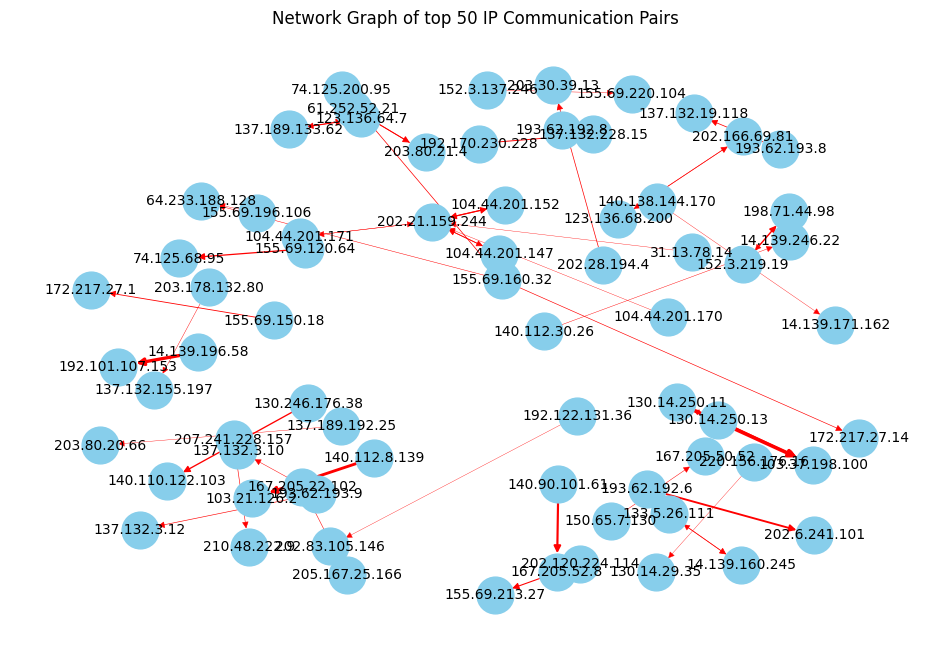

In [2]:
# part e
print("\n(E)")
# top 5 communication pairs
print("\n Top 5 communication pairs by IP address: ")
top_5_comm_pairs = top_n(['src_IP', 'dst_IP'], 5)
print(top_5_comm_pairs)

# all ethernet_types
print(top_n('ethernet_type', 10))


# Network graph for top 50 communication pairs 

top_50_comm_pairs = top_n(['src_IP', 'dst_IP'], 50)

# Initialize a multi-directed graph
G = nx.MultiDiGraph()

# Add edges to the graph with weights based on the frequency of communication
for index, (src, dst, count) in top_50_comm_pairs.iterrows():
  G.add_edge(src, dst, weight=count)

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.5, iterations=16)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight']/1000 for (u, v, d) in G.edges(data=True)], edge_color='red', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title('Network Graph of top 50 IP Communication Pairs')
plt.axis('off')
plt.show()
